<h1><center>Audit de la qualité de la donnée</center></h1>

## Import libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from ipywidgets import interact, widgets
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [19]:
path = 'C:/Users/AymenBouhou/Desktop/QuadraticFoot/Data/Fifa/2017.csv'

In [ ]:
years_list = [str(year) for year in range(2017, 2024)]

for i in years_list:
    df+i

# Determine the column to compare across the datasets
column_to_compare = 'column_name'

# Determine the list of columns to include in the table
columns_to_include = []
for df in [df_2017, df_2018, df_2019, df_2020, df_2021]:
    if not df[column_to_compare].isnull().all():
        columns_to_include.append(column_to_compare)

# Create the table DataFrame
table_data = []
for df, df_name in zip([df_2017, df_2018, df_2019, df_2020, df_2021], ['2017', '2018', '2019', '2020', '2021']):
    row_data = {}
    for col in columns_to_include:
        if df[col].isnull().all():
            row_data[col] = 'X'
        else:
            row_data[col] = ''
    table_data.append(row_data)
table = pd.DataFrame(table_data, index=['2017', '2018', '2019', '2020', '2021'])

# Print the table
print(table)


In [20]:
df.head()

,sofifa_id,player_url,short_name,age,height,nationality,club_name,league_name,player_positions,potential,weight_kg,foot,best_overall,best_position,growth,joined,loan_date_end,value,wage,release_clause,total_attacking,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,total_skill,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,total_movement,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,total_power,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,total_mentality,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,total_defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,international_reputation,pace_/_diving,shooting_/_handling,passing_/_kicking,dribbling_/_reflexes,defending_/_pace,physical_/_positioning
0,231747,/player/231747/kylian-mbappe/230024/,K. Mbappé,23,"182cm / 6'0""",France,Paris Saint Germain,[France] Lig,ST,95,75kg / 165lbs,Right,92,ST,4,"Jul 1, 2018",NaN,€190.5M,€230K,€366.7M,411,78,93,72,85,83,404,93,80,69,71,91,461,97,97,93,93,81,410,88,77,87,76,82,361,64,38,92,83,84,88,92,26,34,32,42,13,5,11,6,2181,470,4,5,High,Low,4,97,89,80,92,36,76
1,192985,/player/192985/kevin-de-bruyne/230024/,K. De Bruyne,31,"181cm / 5'11""",Belgium,Manchester City,[England] Premier Le,CM,91,75kg / 165lbs,Right,91,CM,0,"Aug 30, 2015",NaN,€107.5M,€350K,€198.9M,410,94,85,55,93,83,441,86,89,83,93,90,393,75,73,76,91,78,409,92,63,89,74,91,405,75,65,88,94,83,88,185,66,66,53,56,15,13,10,13,2299,481,5,4,High,Medium,4,74,88,93,86,63,77
2,188545,/player/188545/robert-lewandowski/230024/,R. Lewandowski,33,"185cm / 6'1""",Poland,FC Barcelona,[Spain] La,ST,91,81kg / 179lbs,Right,91,ST,0,"Jul 18, 2022",NaN,€84M,€420K,€172.2M,429,71,94,91,84,89,408,85,79,85,70,89,403,76,75,77,93,82,423,91,85,76,87,84,395,81,49,94,81,90,88,96,35,42,19,51,15,6,8,10,2205,458,4,4,High,Medium,5,75,91,79,86,44,83
3,165153,/player/165153/karim-benzema/230024/,K. Benzema,34,"185cm / 6'1""",France,Real Madrid,[Spain] La,CF,91,81kg / 179lbs,Right,91,CF,0,"Jul 9, 2009",NaN,€64M,€450K,€131.2M,433,75,91,90,89,88,409,87,82,73,76,91,398,78,79,77,92,72,411,87,79,82,82,81,366,63,39,92,90,82,90,85,43,24,18,41,13,11,5,7,2143,454,4,4,Medium,Medium,4,79,88,83,87,39,78
4,158023,/player/158023/lionel-messi/230024/,L. Messi,35,"169cm / 5'7""",Argentina,Paris Saint Germain,[France] Lig,CAM,91,67kg / 148lbs,Left,92,CAM,0,"Aug 10, 2021",NaN,€54M,€195K,€99.9M,423,84,90,70,91,88,464,95,93,93,90,93,441,87,76,91,92,95,383,86,68,70,68,91,346,44,40,93,94,75,96,79,20,35,24,54,6,11,14,8,2190,452,4,4,Low,Low,5,81,89,90,94,34,64


## Exploring the data

In [21]:
print("Le nombre de colonnes de la base est: ", df.shape[1])
print("Le nombre de lignes de la base est: ", df.shape[0])

Le nombre de colonnes de la base est:  73
Le nombre de lignes de la base est:  18440


In [22]:
df=df.drop_duplicates(subset=['sofifa_id'], keep='first')

In [23]:
print("Le nombre de lignes dans la base de données après avoir supprimé les doublons est: ", df.shape[0])

Le nombre de lignes dans la base de données après avoir supprimé les doublons est:  18283


In [24]:
int_columns = df.select_dtypes(include=['int64']).columns
int_columns = int_columns.sort_values()
print(f"La base contient '{len(int_columns)}' variables \n")
print("La liste des variables continues: \n")
for i in int_columns:
    print(i)

La base contient '56' variables 

La liste des variables continues: 

age
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
base_stats
best_overall
defending_/_pace
defending_marking
defending_sliding_tackle
defending_standing_tackle
dribbling_/_reflexes
gk_diving
gk_handling
gk_positioning
gk_reflexes
growth
international_reputation
mentality_aggression
mentality_composure
mentality_interceptions
mentality_penalties
mentality_positioning
mentality_vision
movement_acceleration
movement_agility
movement_balance
movement_reactions
movement_sprint_speed
pace_/_diving
passing_/_kicking
physical_/_positioning
potential
power_jumping
power_long_shots
power_shot_power
power_stamina
power_strength
shooting_/_handling
skill_ball_control
skill_curve
skill_dribbling
skill_fk_accuracy
skill_long_passing
skill_moves
sofifa_id
total_attacking
total_defending
total_goalkeeping
total_mentality
total_movement
total_power
total_skill
total_stats


In [25]:
cat_cols = df.select_dtypes(include=['object'])


cat_cols_df = pd.DataFrame(columns=['Variable catégorielle', "Nombre des d'attributs"])


for col in cat_cols:
    num_unique_values = len(df[col].unique())
    cat_cols_df = cat_cols_df.append({'Variable catégorielle': col, "Nombre des d'attributs": num_unique_values},
                                 ignore_index=True)

print("Un tableau qui regroupe les variables catégorielles avec leurs nombres d'attributs: \n ")

cat_cols_df

Un tableau qui regroupe les variables catégorielles avec leurs nombres d'attributs: 
 


,Variable catégorielle,Nombre des d'attributs
0,player_url,18283
1,short_name,17491
2,height,49
3,nationality,158
4,club_name,673
5,league_name,49
6,player_positions,15
7,weight_kg,54
8,foot,2
9,best_position,15


## Missing values and outliers

<AxesSubplot: >

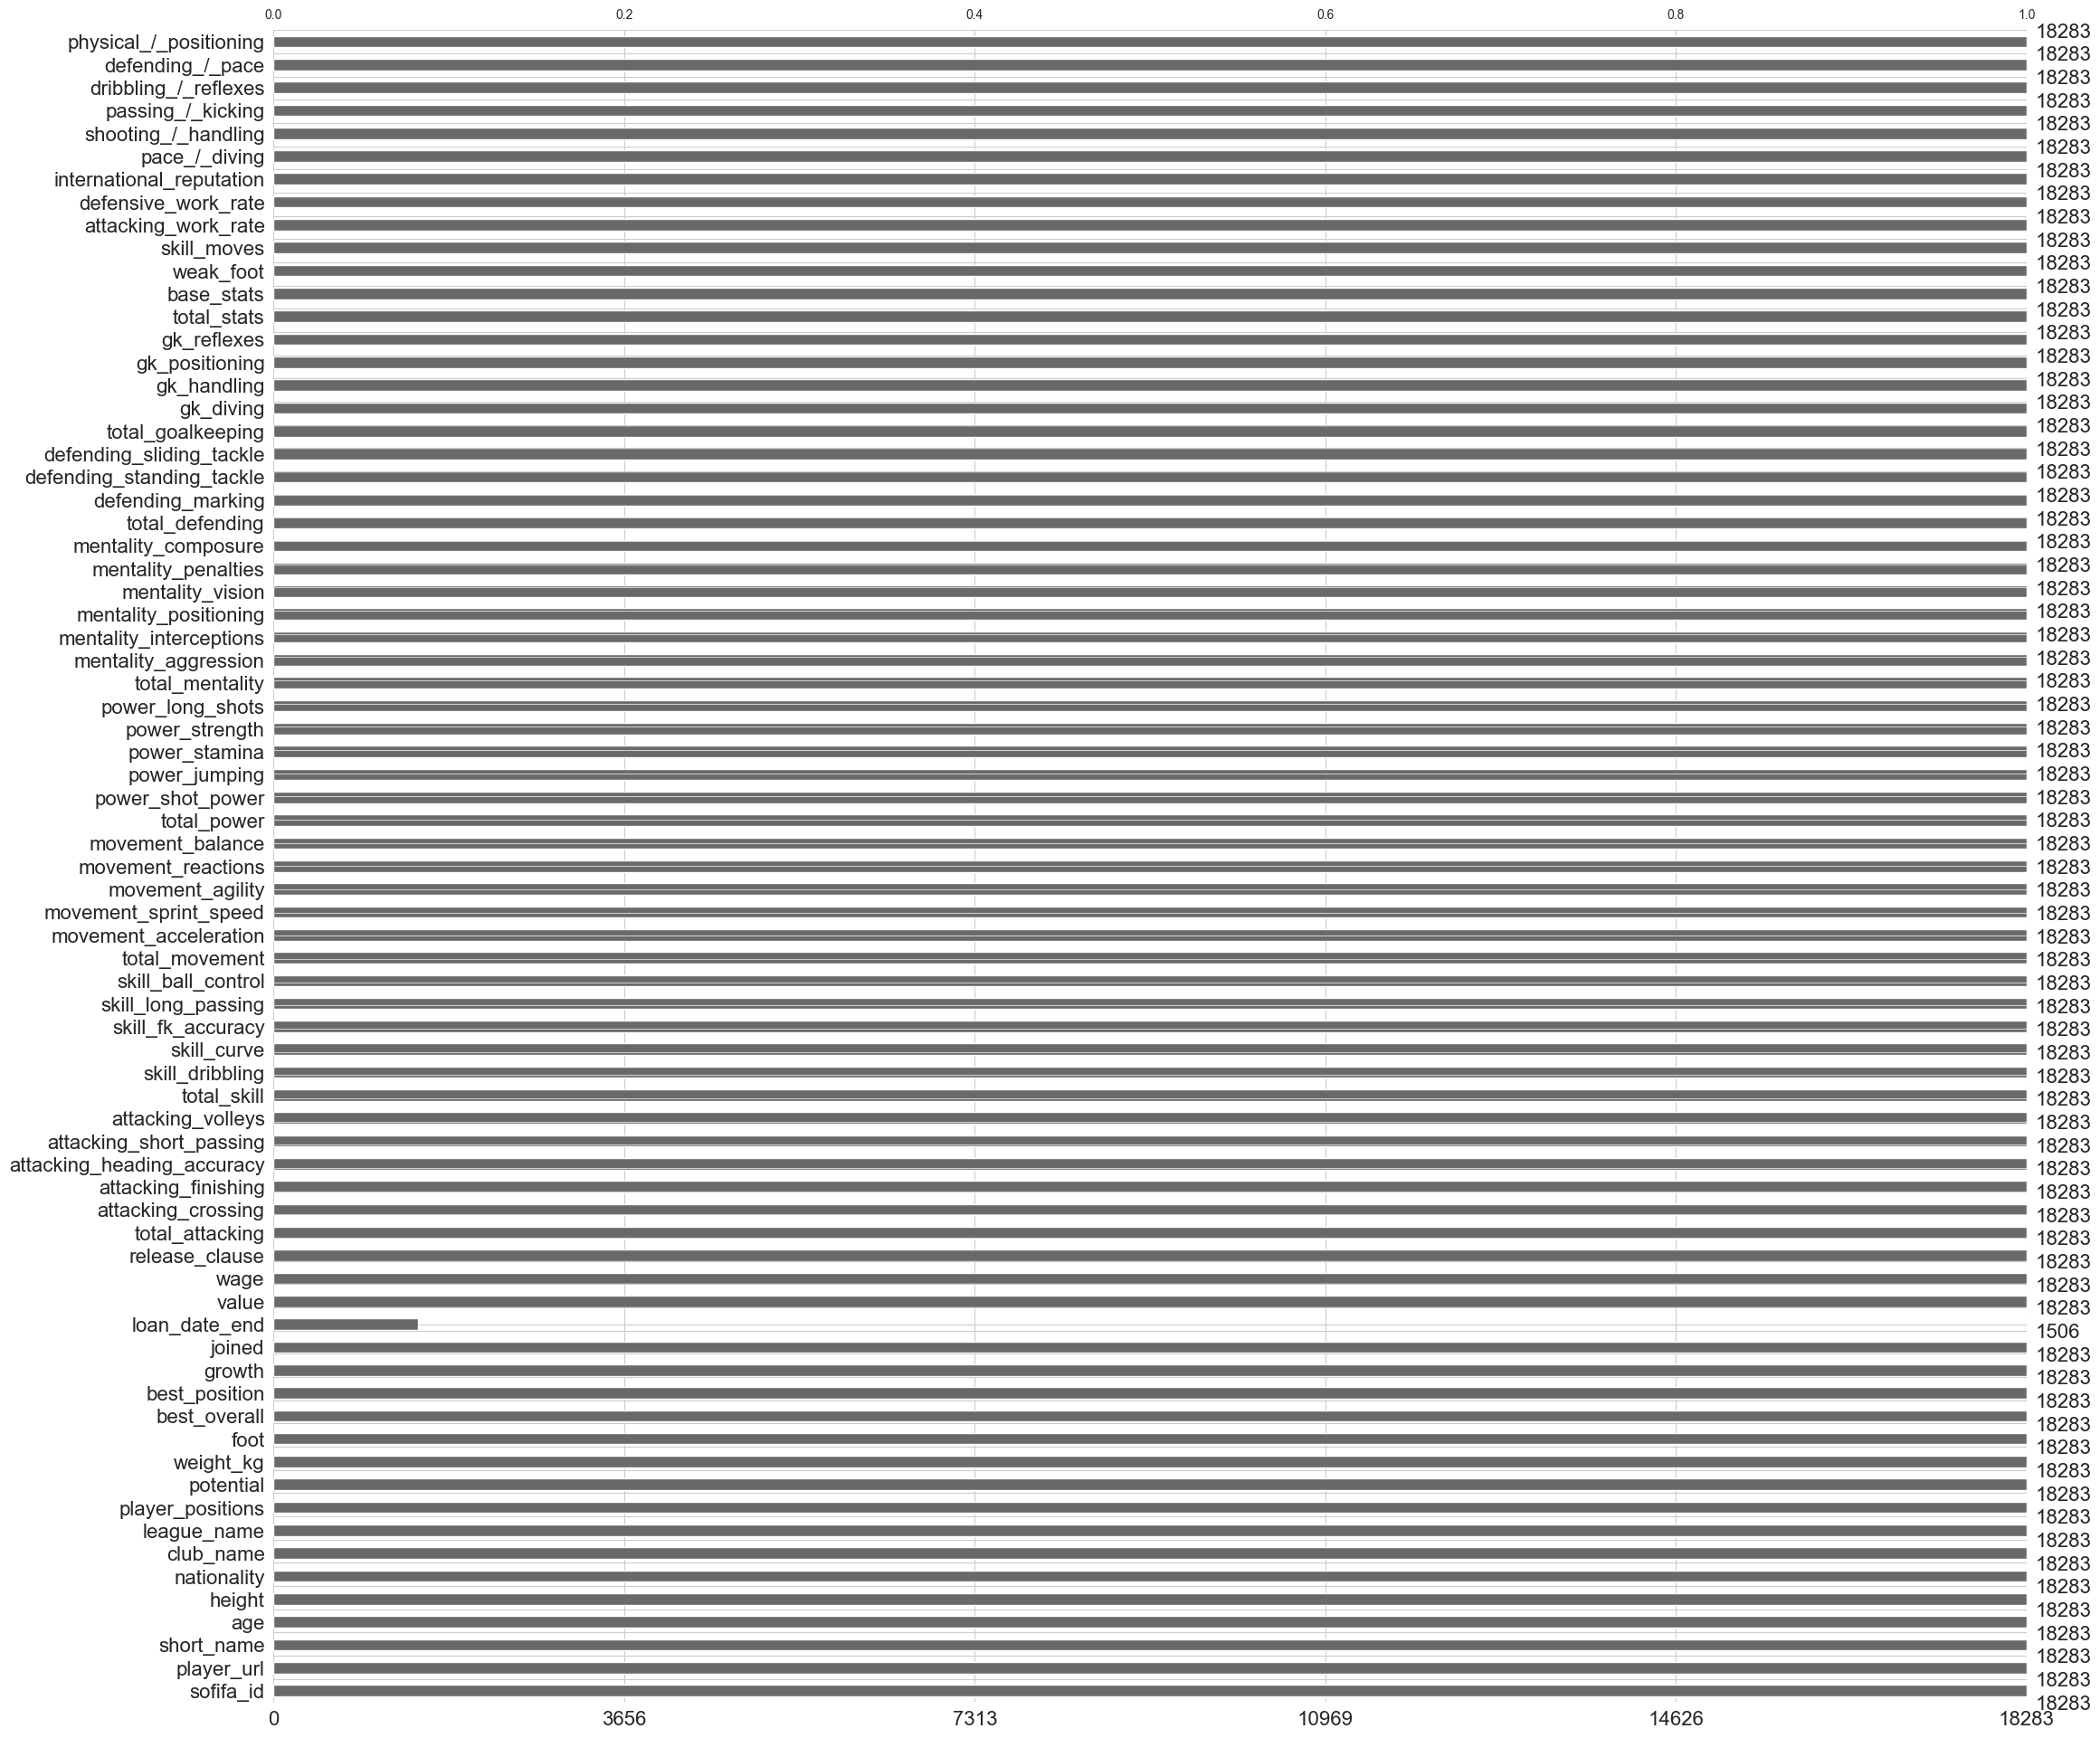

In [26]:
msno.bar(df)

In [27]:
df.drop(["player_url", "loan_date_end"], axis = 1, inplace = True)
df.set_index('sofifa_id', inplace=True)

In [28]:
df.describe()

,age,potential,best_overall,growth,total_attacking,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,total_skill,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,total_movement,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,total_power,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,total_mentality,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,total_defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,international_reputation,pace_/_diving,shooting_/_handling,passing_/_kicking,dribbling_/_reflexes,defending_/_pace,physical_/_positioning
count,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.00000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.00000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000
mean,24.943445,70.813871,66.777990,5.040201,249.232128,49.467702,46.237652,51.923098,58.992014,42.611661,258.817700,55.846962,47.859268,43.01083,53.606356,58.494284,318.583493,64.666904,64.838812,63.479079,61.590385,64.008314,297.267462,57.803916,64.683914,62.885631,65.126183,46.767817,255.476235,55.872997,46.957611,50.457857,54.230433,47.957337,58.11508,141.494722,46.701417,48.458677,46.334628,81.459881,16.400864,16.214899,16.232183,16.509435,1602.331620,357.860471,2.949516,2.385057,1.084833,68.007439,53.763441,58.001313,63.065744,50.265055,64.757480
std,4.777144,6.283713,6.662787,5.397215,74.637687,17.825166,19.643344,17.339998,14.316436,17.652827,78.239984,18.743301,17.964613,17.01356,14.620907,16.624231,57.562926,15.249282,15.023881,14.891319,8.930285,14.535451,51.523614,12.953828,12.193523,16.186032,12.581149,19.361453,65.526971,16.814306,20.618266,19.713446,13.495680,15.767744,12.08964,61.178289,20.367718,21.090407,20.627473,85.295953,17.605337,16.957366,17.114088,17.915690,274.222067,39.705776,0.681800,0.775373,0.354185,10.503809,13.644898,9.746177,9.367215,16.357612,9.527644
min,16.000000,48.000000,46.000000,0.000000,43.000000,5.000000,3.000000,5.000000,10.000000,3.000000,43.000000,4.000000,5.000000,5.00000,9.000000,5.000000,115.000000,12.000000,15.000000,17.000000,30.000000,19.000000,135.000000,18.000000,23.000000,11.000000,25.000000,4.000000,56.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.00000,22.000000,3.000000,6.000000,6.000000,12.000000,2.000000,2.000000,2.000000,2.000000,745.000000,237.000000,1.000000,1.000000,1.000000,28.000000,18.000000,25.000000,28.000000,14.000000,30.000000
25%,21.000000,66.000000,63.000000,0.000000,224.000000,39.000000,31.000000,44.000000,54.000000,30.000000,227.000000,50.000000,36.000000,32.00000,45.000000,55.000000,291.000000,57.000000,58.000000,55.000000,56.000000,56.000000,267.000000,48.000000,57.000000,55.000000,57.000000,33.000000,231.000000,45.000000,26.000000,40.000000,45.000000,38.000000,51.00000,84.000000,29.000000,29.000000,26.000000,47.000000,8.000000,8.000000,8.000000,8.000000,1470.000000,331.000000,3.000000,2.000000,1.000000,62.000000,44.000000,52.000000,58.000000,36.000000,59.000000
50%,24.000000,71.000000,67.000000,3.000000,264.000000,54.000000,50.000000,55.000000,62.000000,44.000000,274.000000,61.000000,50.000000,42.00000,56.000000,63.000000,32

In [ ]:
variable_dropdown = widgets.Dropdown(
    options=int_columns,
    value=int_columns[0],
    description='Variable:'
)
sns.set_style("whitegrid")
def generate_boxplot(variable):
    fig, ax = plt.subplots(1, figsize=(20, 10))
    sns.boxplot(x=df[variable])
    plt.title('Boxplot of {}'.format(variable))
    plt.xlabel('{}'.format(variable))
    plt.show()

widgets.interact(generate_boxplot, variable=variable_dropdown)

In [30]:

os.path.splitext(path)[0]+'_1.csv'


'C:/Users/AymenBouhou/Desktop/Stage/scraper-main/src/2023_1.csv'